In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif


C:\Users\Nived Shah\AppData\Local\Temp\ipykernel_8536\693829924.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
read_df = pd.read_csv('HIGGS_smaller.csv')

In [4]:
def add_column_names(df):
    column_names = ['class',
        'lepton_pT', 'lepton_eta', 'lepton_phi', 'missing_energy_magnitude', 'missing_energy_phi',
        'jet_1_pt', 'jet_1_eta', 'jet_1_phi', 'jet_1_btag',
        'jet_2_pt', 'jet_2_eta', 'jet_2_phi', 'jet_2_btag',
        'jet_3_pt', 'jet_3_eta', 'jet_3_phi', 'jet_3_btag',
        'jet_4_pt', 'jet_4_eta', 'jet_4_phi', 'jet_4_btag',
        'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'
    ]

    df.columns = column_names
    return df

In [5]:
df = add_column_names(read_df)

In [6]:
df.head()

,class,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,...,jet_4_eta,jet_4_phi,jet_4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.532373,-0.563982,-0.707137,0.682998,0.702177,2.064735,-1.227911,0.030652,0.000000,...,-0.234484,-1.359247,0.000000,0.671950,2.374774,0.981455,0.856261,0.995606,1.971345,1.486434
1,0.0,0.341129,0.069098,0.325565,2.925696,0.500175,1.929798,-0.790229,-1.300509,2.173076,...,0.135289,1.291674,3.101961,2.793955,1.845023,0.971333,3.271633,1.187914,1.998760,2.342642
2,1.0,1.768051,-0.226015,-1.334685,1.382299,0.217815,0.470495,-0.552574,0.669846,0.000000,...,1.217127,1.470911,0.000000,0.977827,0.756365,2.134194,1.172502,0.651040,0.825880,0.750081
3,0.0,0.716481,-0.800656,-1.245352,0.648034,0.972671,0.600302,0.714921,1.638340,0.000000,...,-0.047932,0.899351,3.101961,1.488407,0.917862,0.983844,0.791456,0.491298,0.732747,0.750671
4,0.0,0.327586,1.395643,1.130114,1.191988,0.713228,0.883368,0.884250,-1.577697,2.173076,...,-0.337754,-0.480818,3.101961,0.852777,1.272682,0.992933,0.824094,1.227924,0.882994,0.805299


In [7]:
df.isnull().sum()

class                       0
lepton_pT                   0
lepton_eta                  0
lepton_phi                  0
missing_energy_magnitude    0
missing_energy_phi          0
jet_1_pt                    0
jet_1_eta                   0
jet_1_phi                   0
jet_1_btag                  0
jet_2_pt                    0
jet_2_eta                   0
jet_2_phi                   0
jet_2_btag                  0
jet_3_pt                    0
jet_3_eta                   0
jet_3_phi                   0
jet_3_btag                  0
jet_4_pt                    0
jet_4_eta                   0
jet_4_phi                   0
jet_4_btag                  0
m_jj                        0
m_jjj                       0
m_lv                        0
m_jlv                       0
m_bb                        0
m_wbb                       0
m_wwbb                      0
dtype: int64

In [8]:
# none of the columns have missing values, other wise we can perform some imputation techniques

In [9]:
df.describe()

,class,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,...,jet_4_eta,jet_4_phi,jet_4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,...,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000
mean,0.528155,0.993285,-0.005985,-0.002650,0.998366,0.001416,0.990549,0.003786,-0.006673,1.004337,...,-0.000581,0.000222,0.994672,1.032670,1.025995,1.050662,1.011109,0.975567,1.034330,0.961325
std,0.499209,0.569758,1.007981,1.004571,0.603324,1.007990,0.476472,1.012672,1.007398,1.027857,...,1.009341,1.005146,1.399653,0.674207,0.382991,0.162497,0.399684,0.527061,0.366120,0.315269
min,0.000000,0.274697,-2.434976,-1.742508,0.001690,-1.743932,0.157473,-2.969725,-1.741237,0.000000,...,-2.497265,-1.742691,0.000000,0.101603,0.297987,0.234146,0.292503,0.067156,0.340333,0.370761
25%,0.000000,0.591119,-0.746114,-0.872486,0.575659,-0.871000,0.679084,-0.687245,-0.879738,0.000000,...,-0.710026,-0.870924,0.000000,0.789034,0.846460,0.985767,0.769028,0.675868,0.820544,0.771713
50%,1.000000,0.852639,-0.007846,-0.003570,0.889777,0.000287,0.894270,0.005916,-0.008257,1.086538,...,-0.002959,-0.001374,0.000000,0.894816,0.951576,0.989783,0.916808,0.874679,0.948435,0.873488
75%,1.000000,1.238789,0.734318,0.864890,1.291532,0.877119,1.167351,0.692145,0.861660,2.173076,...,0.715767,0.869941,3.101961,1.025956,1.084873,1.021725,1.144072,1.139780,1.141846,1.059154
max,1.000000,8.790659,2.434868,1.743236,11.531485,1.743257,7.419452,2.966703,1.741454,2.173076,...,2.498009,1.743372,3.101961,18.002125,9.153964,3.954101,8.140121,8.835245,6.775816,5.111963


In [10]:
# percent of signal (vs. background) in the dataset
df['class'].value_counts(normalize=True)

class
1.0    0.528155
0.0    0.471845
Name: proportion, dtype: float64

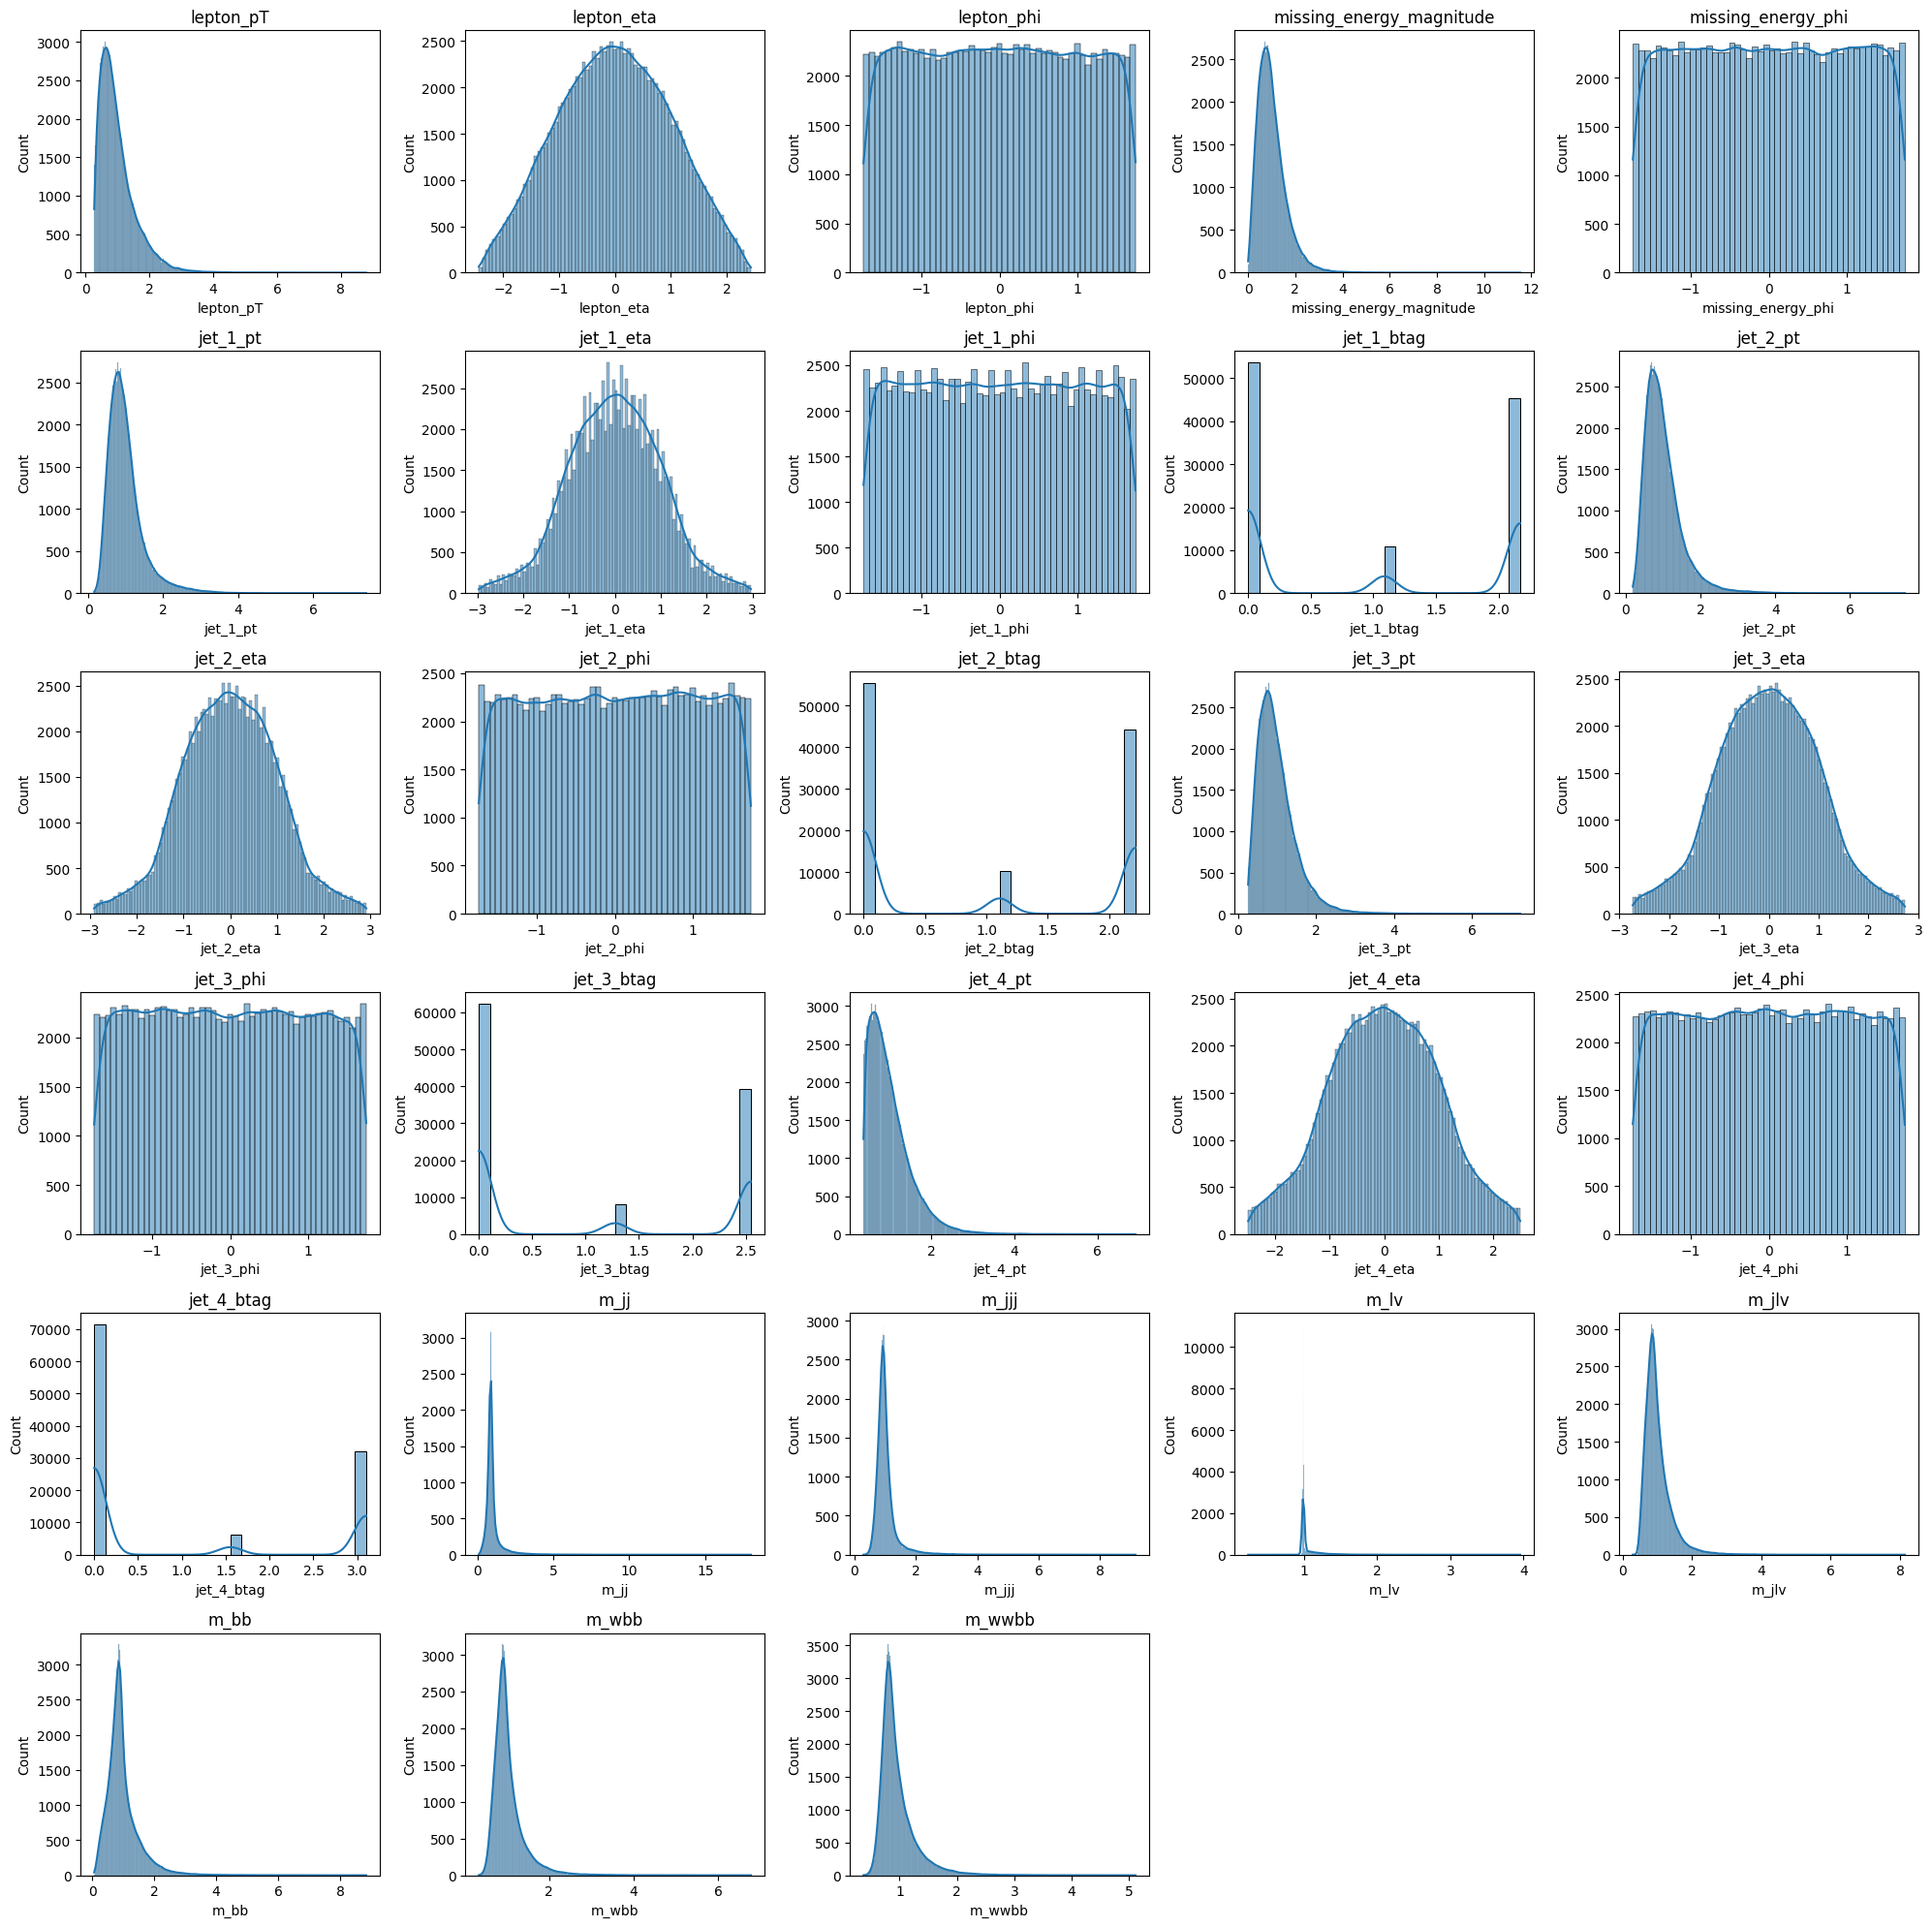

In [11]:
# plot the distribution of the features
plt.figure(figsize=(20, 20))
for i, col in enumerate(df.columns[1:]):
    plt.subplot(6, 5, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


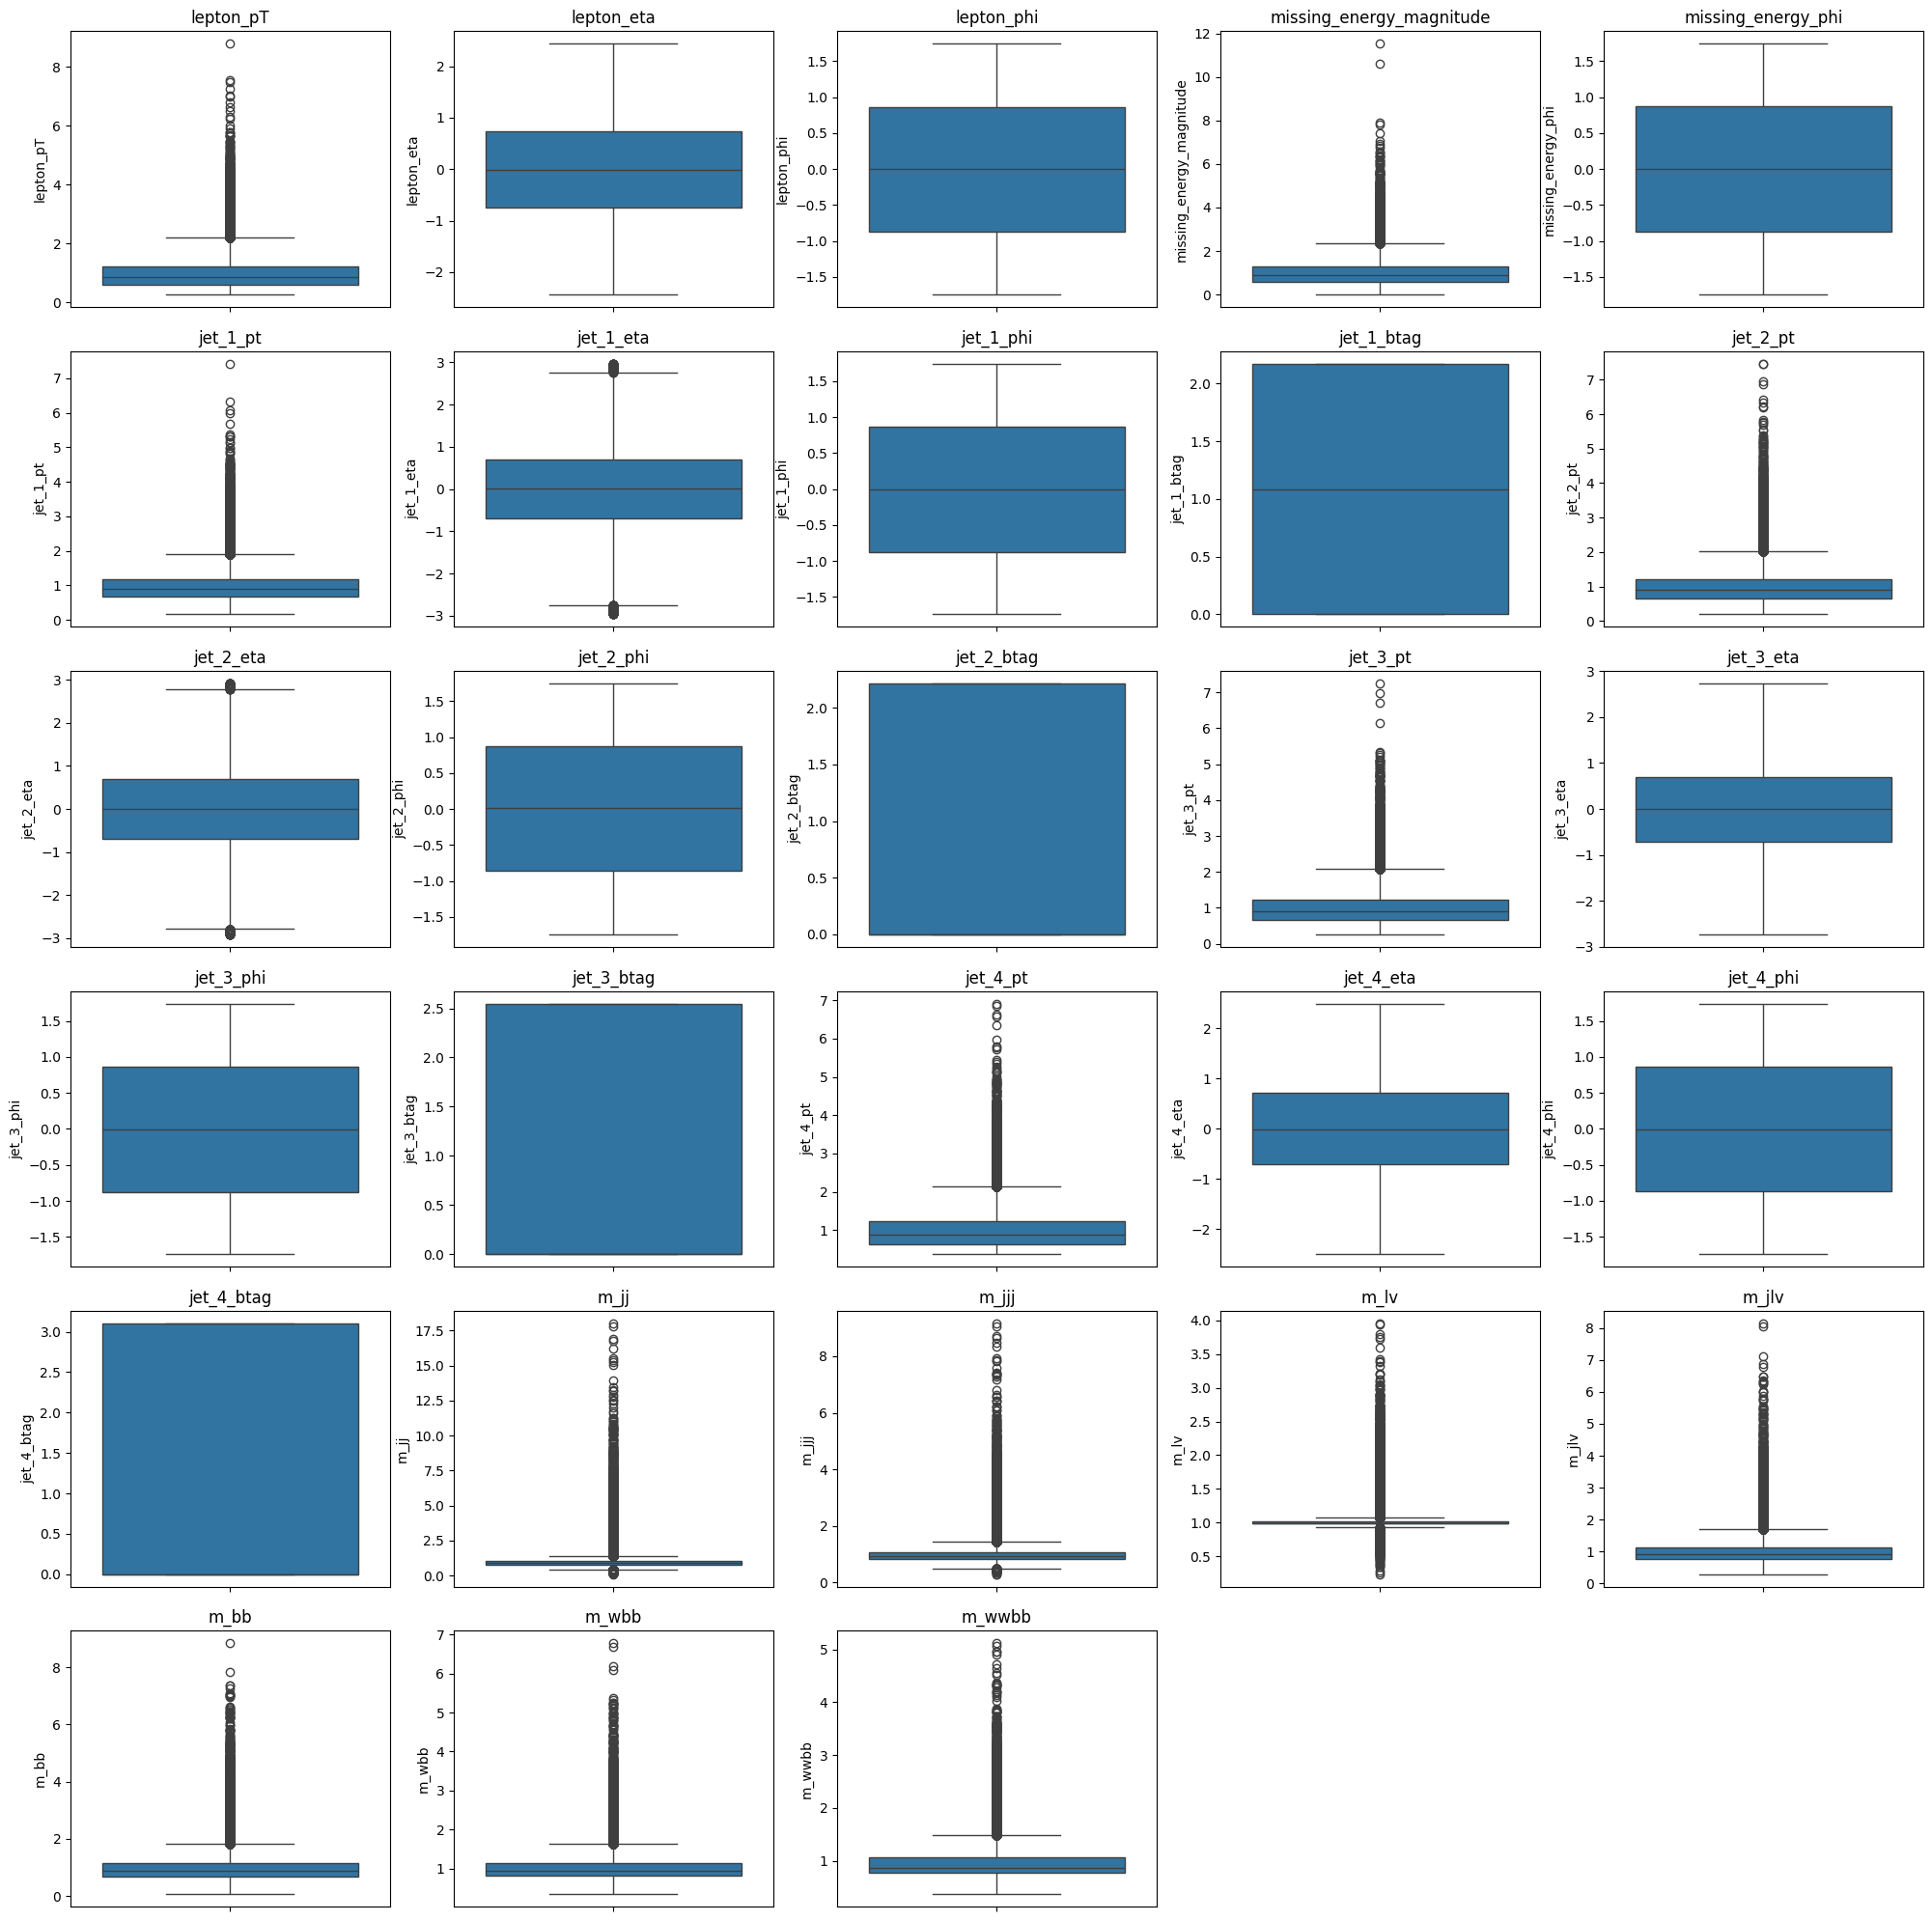

In [12]:
# boxplot to visualize outliers
plt.figure(figsize=(20, 20))
for i, col in enumerate(df.columns[1:]):
    plt.subplot(6, 5, i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

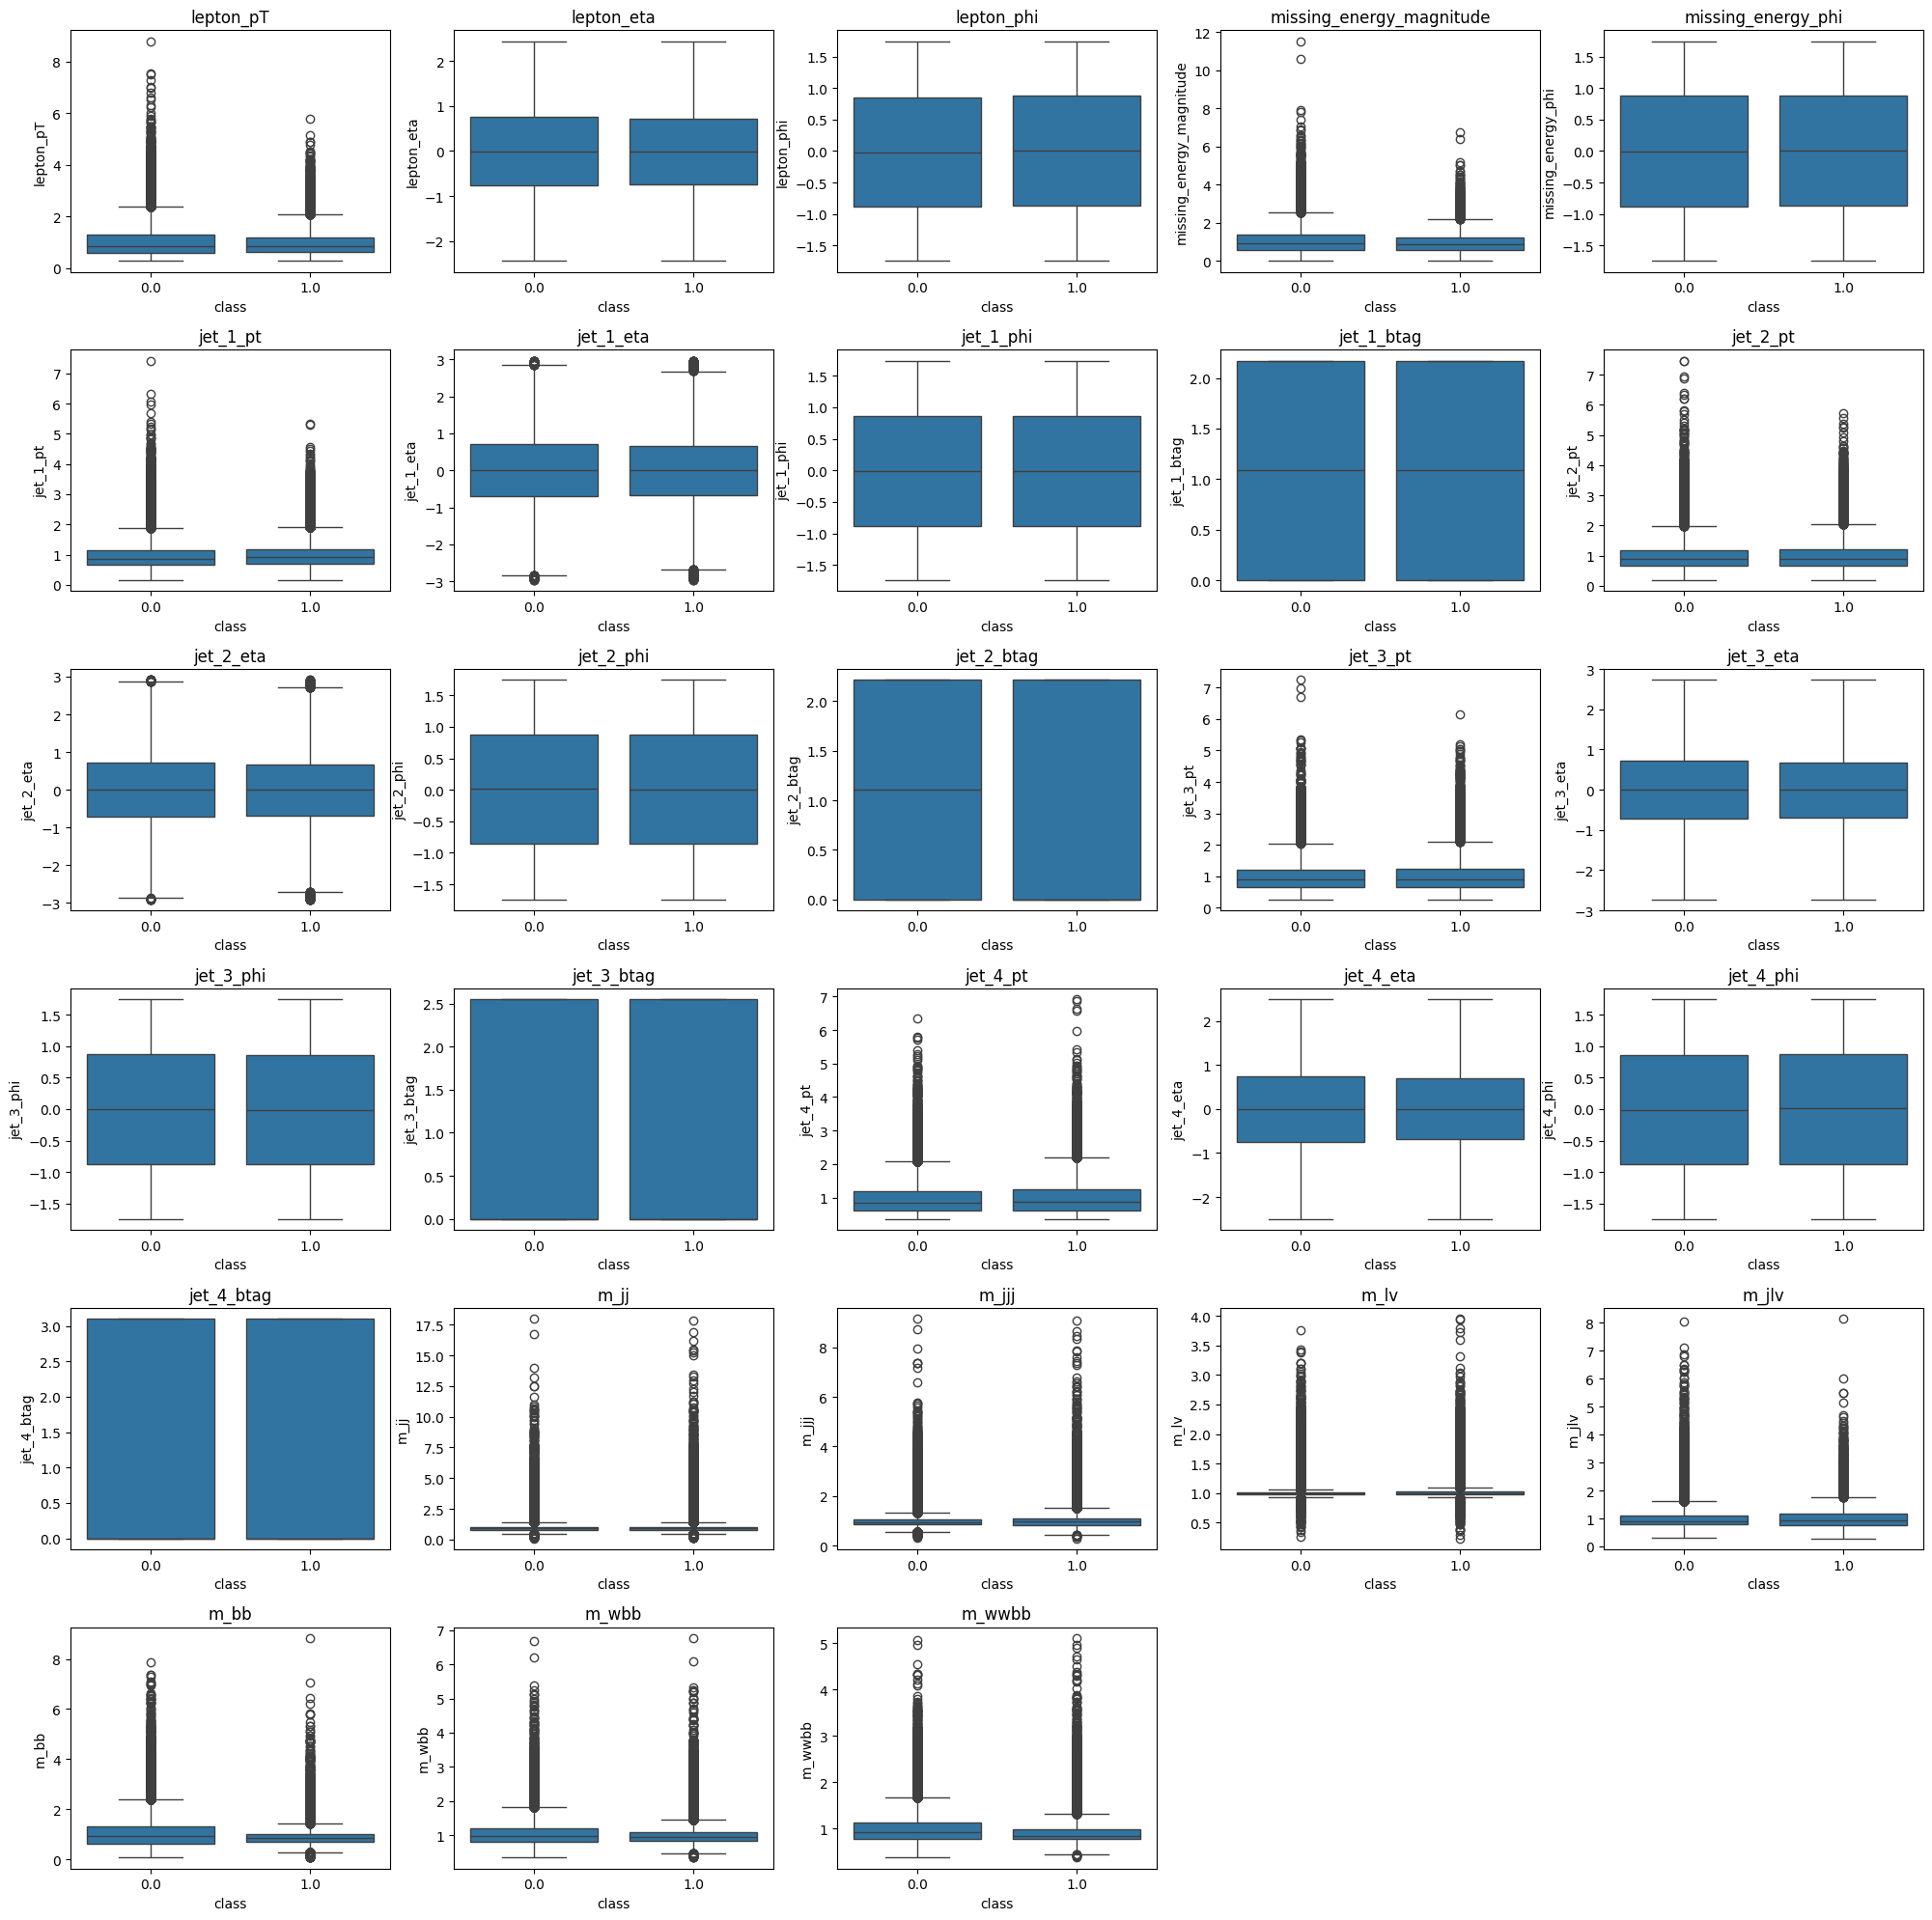

In [13]:
# conditional boxplots of all the 'm_' features with respect to the classes 0 and 1
plt.figure(figsize=(20, 20))
for i, col in enumerate(df.columns[1:]):
    plt.subplot(6, 5, i+1)
    sns.boxplot(x='class', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()


In [14]:
# the box plots of the features conditional on the class show that the features have no charactersitic differences between the classes

# we can also see that nearly half the features have values outside the whiskers of the box plots
# this means that we cannot ignore such values as outliers, as they are present in a significant number
# thus outlier detecter for this dataset is not a good idea
# and we can proceed with the normalization/standardization of the features

In [15]:
# splitting the data into features and target
X = df.drop('class', axis=1)
y = df['class']

In [16]:
# normalize columns have min > 0, such that the mean is 1
# standardize other columns such that mean = 0, std = 1
# this the normalization/standardization technique used in the paper that introduced the dataset

for col in X.columns:
    if X[col].min() > 0:
        X[col] = X[col] / X[col].mean()
    else:
        X[col] = (X[col] - X[col].mean()) / X[col].std()

X.describe()

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,jet_2_pt,...,jet_4_eta,jet_4_phi,jet_4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,110000.000000,1.100000e+05,1.100000e+05,110000.000000,1.100000e+05,110000.000000,1.100000e+05,1.100000e+05,1.100000e+05,110000.000000,...,1.100000e+05,1.100000e+05,1.100000e+05,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000
mean,1.000000,2.067033e-18,2.829252e-17,1.000000,-2.034736e-17,1.000000,-2.454602e-18,-4.017796e-17,2.583792e-19,1.000000,...,2.386778e-17,2.170385e-17,1.459842e-17,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,0.573609,1.000000e+00,1.000000e+00,0.604311,1.000000e+00,0.481018,1.000000e+00,1.000000e+00,1.000000e+00,0.500566,...,1.000000e+00,1.000000e+00,1.000000e+00,0.652877,0.373287,0.154662,0.395293,0.540262,0.353969,0.327953
min,0.276554,-2.409759e+00,-1.731941e+00,0.001693,-1.731513e+00,0.158975,-2.936303e+00,-1.721827e+00,-9.771166e-01,0.190827,...,-2.473578e+00,-1.733989e+00,-7.106561e-01,0.098389,0.290437,0.222855,0.289289,0.068838,0.329037,0.385677
25%,0.595116,-7.342694e-01,-8.658775e-01,0.576601,-8.655000e-01,0.685564,-6.823836e-01,-8.666539e-01,-9.771166e-01,0.662438,...,-7.028793e-01,-8.666856e-01,-7.106561e-01,0.764072,0.825014,0.938235,0.760579,0.692795,0.793310,0.802759
50%,0.858404,-1.846480e-03,-9.156908e-04,0.891234,-1.119727e-03,0.902803,2.103686e-03,-1.572968e-03,7.997369e-02,0.899196,...,-2.355975e-03,-1.587728e-03,-7.106561e-01,0.866507,0.927466,0.942057,0.906735,0.896586,0.916956,0.908629
75%,1.247164,7.344415e-01,8.635935e-01,1.293646,8.687619e-01,1.178489,6.797461e-01,8.619563e-01,1.137064e+00,1.213476,...,7.097190e-01,8.652659e-01,1.505579e+00,0.993499,1.057386,0.972459,1.131503,1.168326,1.103948,1.101764
max,8.850090,2.421527e+00,1.737942e+00,11.550361,1.728034e+00,7.490245,2.925842e+00,1.735289e+00,1.137064e+00,7.522564,...,2.475467e+00,1.734226e+00,1.505579e+00,17.432599,8.922034,3.763438,8.050687,9.056527,6.550924,5.317620


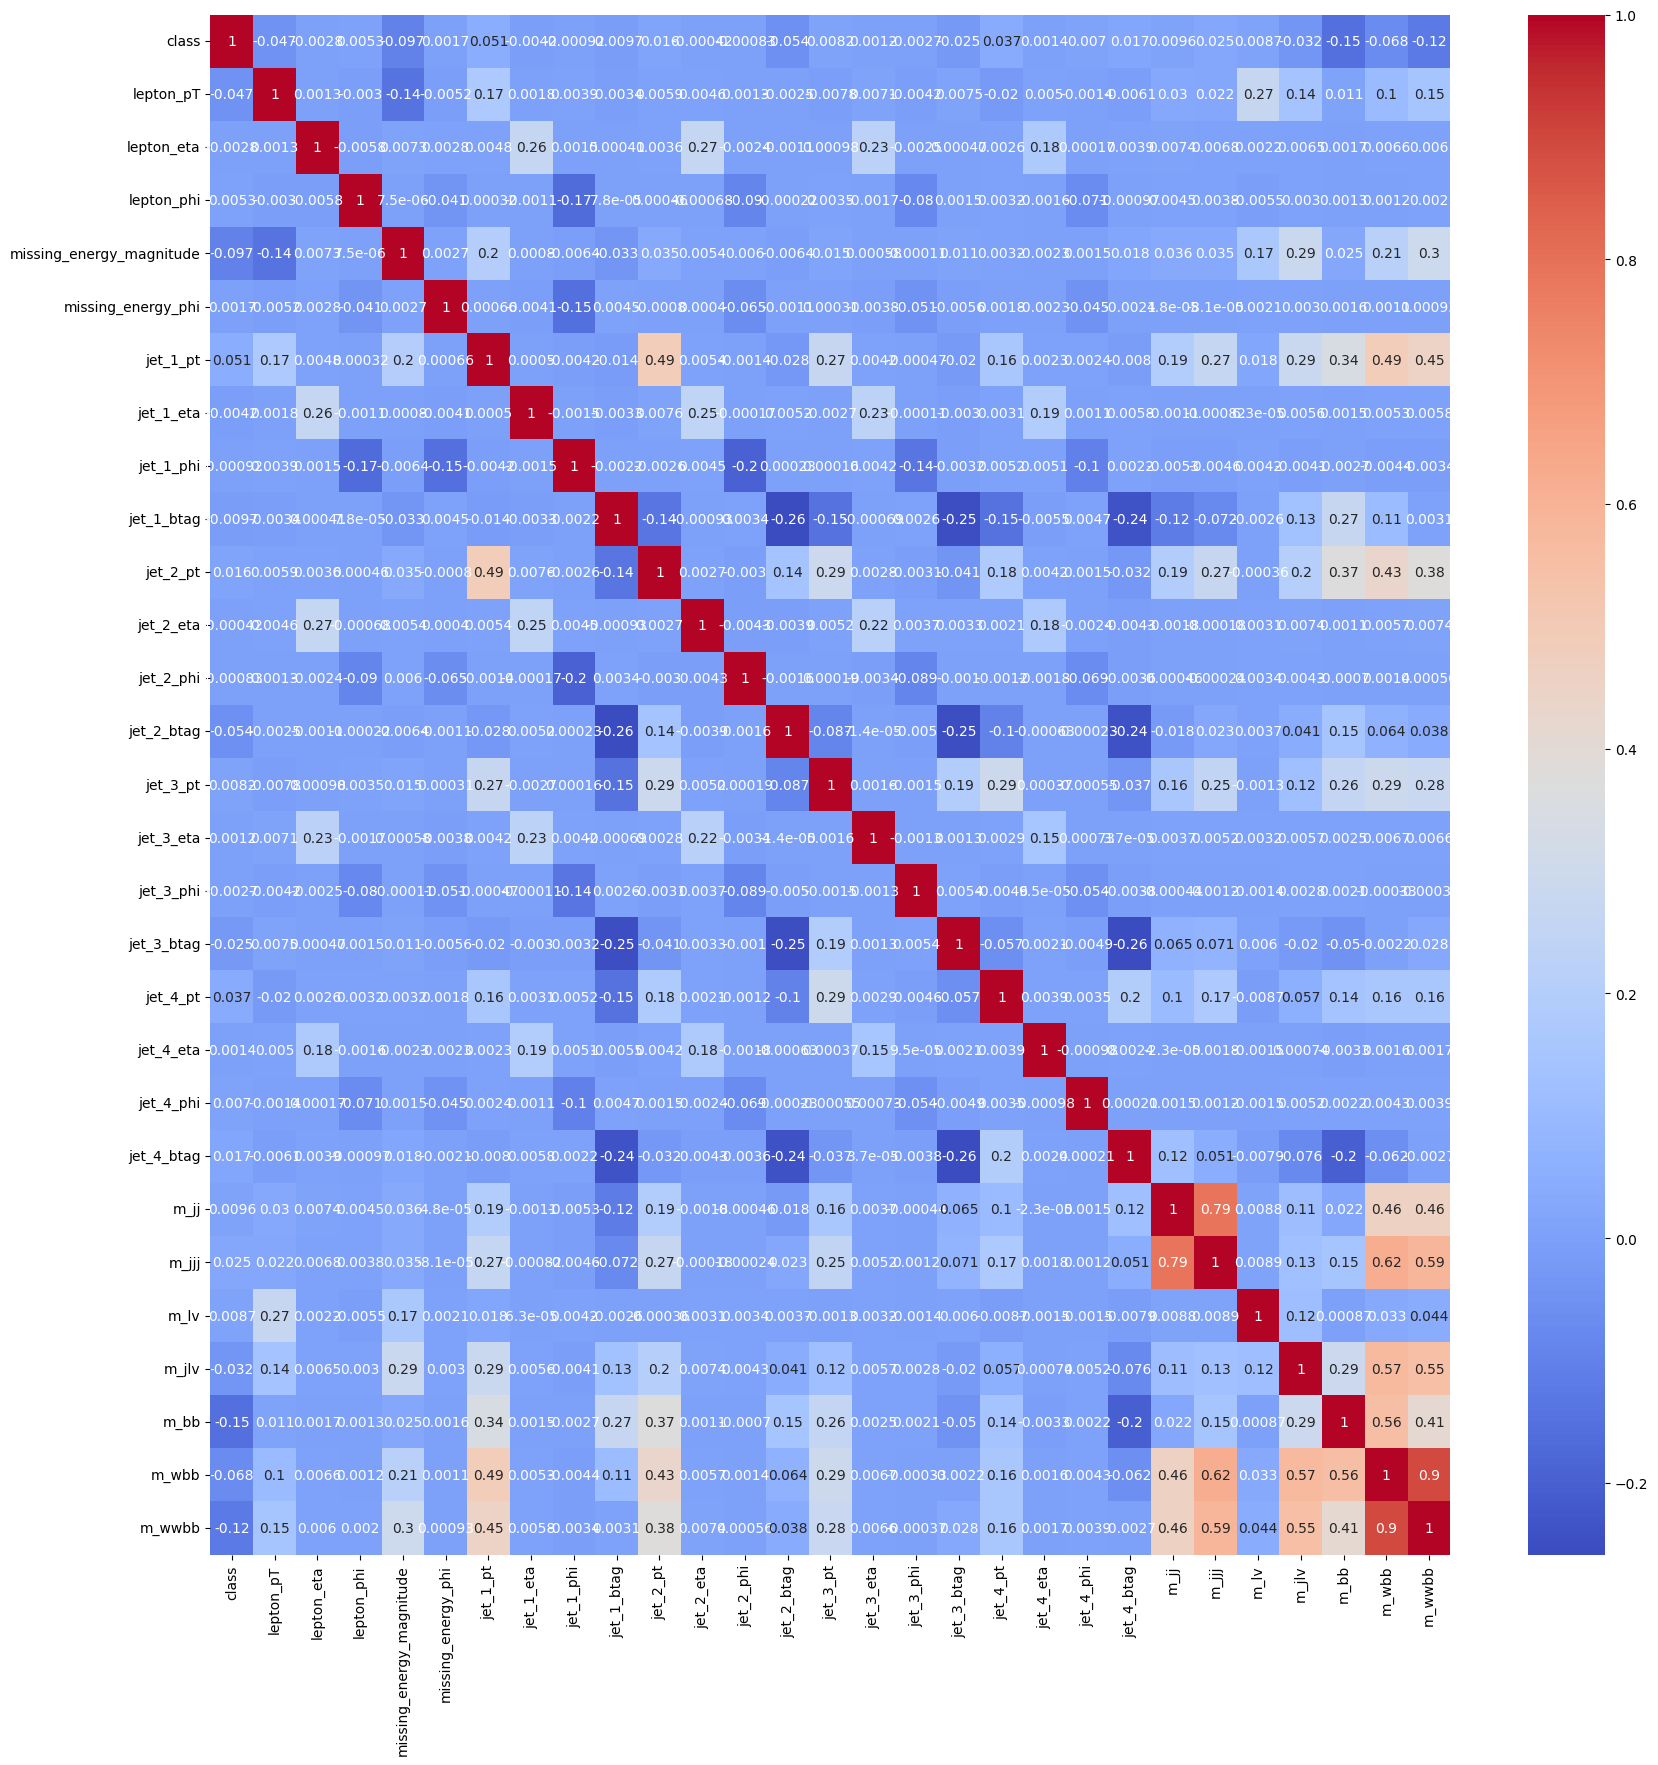

In [17]:
# correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [18]:
# as evident in the correlation matrix, in general the features are not correlated with each other
# but m_wbb and m_wwbb are highly correlated with each other which means we can drop one of them (wbb here)

# drop the column m_wbb
X.drop('m_wbb', axis=1, inplace=True)


In [19]:
# Feature Engineering, adding new features 

# adding the sum of the transverse momenta of the jets
X['sum_jet_pt'] = X['jet_1_pt'] + X['jet_2_pt'] + X['jet_3_pt'] + X['jet_4_pt']

# adding the sum of the btag values of the jets
X['sum_jet_btag'] = X['jet_1_btag'] + X['jet_2_btag'] + X['jet_3_btag'] + X['jet_4_btag']
X['sum_jet_eta'] = X['jet_1_eta'] + X['jet_2_eta'] + X['jet_3_eta'] + X['jet_4_eta']
X['sum_jet_phi'] = X['jet_1_phi'] + X['jet_2_phi'] + X['jet_3_phi'] + X['jet_4_phi']

X['mass_combination'] = X['m_bb'] + X['m_wwbb']
X['missing_energy_lepton_diff'] = X['missing_energy_magnitude'] - X['lepton_pT']

X.head()

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,jet_2_pt,...,m_lv,m_jlv,m_bb,m_wwbb,sum_jet_pt,sum_jet_btag,sum_jet_eta,sum_jet_phi,mass_combination,missing_energy_lepton_diff
0,0.535973,-0.553579,-0.701281,0.684116,0.695207,2.084436,-1.216284,0.037050,-0.977117,1.675445,...,0.934130,0.846853,1.020542,1.546234,6.847046,0.764444,-0.656224,2.041414,2.566775,0.148143
1,0.343435,0.074488,0.326722,2.930485,0.494805,1.948211,-0.784079,-1.284335,1.137064,1.056907,...,0.924497,3.235688,1.217666,2.436888,5.069836,0.852250,-3.459013,-0.055300,3.654554,2.587050
2,1.780004,-0.218288,-1.325974,1.384562,0.214684,0.474984,-0.549398,0.671551,-0.977117,0.735775,...,2.031286,1.159620,0.667346,0.780257,2.093575,0.764444,1.743971,1.462466,1.447603,-0.395442
3,0.721324,-0.788380,-1.237048,0.649095,0.963556,0.606030,0.702236,1.632932,-0.977117,1.176047,...,0.936404,0.782760,0.503603,0.780871,3.973354,0.868450,1.125689,2.114629,1.284474,-0.072230
4,0.329801,1.390530,1.127610,1.193939,0.706169,0.891797,0.869447,-1.559487,1.137064,0.443190,...,0.945054,0.815040,1.258678,0.837697,3.162909,0.852250,-0.151247,-2.149352,2.096375,0.864138


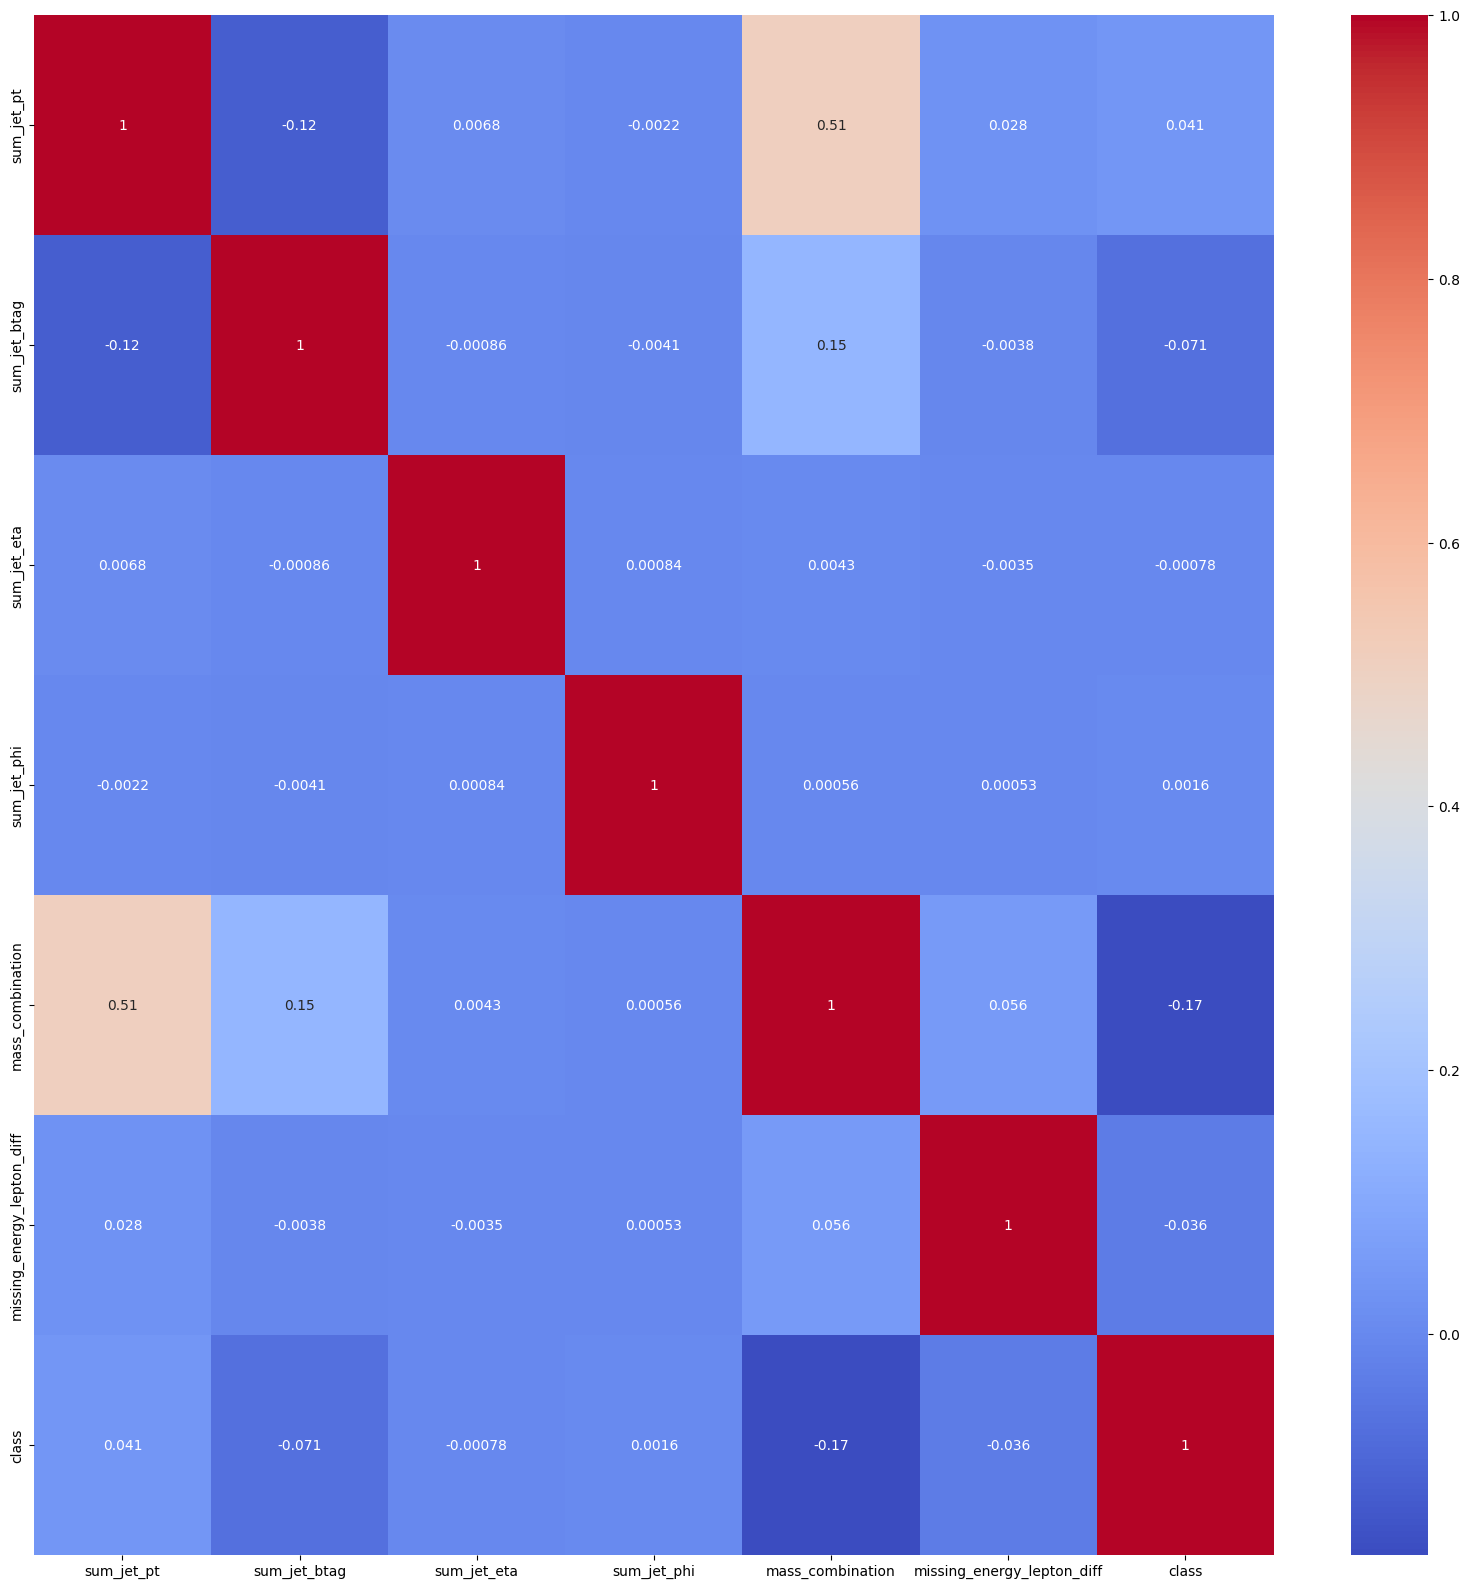

In [20]:
# see correlation of new features with the target
# create a temporary df to store only the new features and the target
temp_df = X.iloc[:, 27:33]
temp_df['class'] = y

corr_matrix = temp_df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [21]:
# the correlation seems to improve a little for sum_jet_pt, sum_jet_btag and mass_combination
# thus we can keep these features and drop the rest

X.drop(['sum_jet_eta', 'sum_jet_phi', 'missing_energy_lepton_diff'], axis=1, inplace=True)


In [22]:
# add the squares of the features
for col in X.columns:
    X[col + '_squared'] = X[col] ** 2

In [23]:
# Feature selection using SelectKBest
# using f_classif as the scoring function
selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(X, y)

# get the selected features
selected_features = X.columns[selector.get_support()]
selected_features

Index(['lepton_pT', 'missing_energy_magnitude', 'jet_1_pt', 'jet_2_btag',
       'jet_4_pt', 'm_bb', 'm_wwbb', 'sum_jet_pt', 'sum_jet_btag',
       'mass_combination', 'lepton_pT_squared',
       'missing_energy_magnitude_squared', 'jet_1_pt_squared',
       'jet_4_eta_squared', 'm_jlv_squared', 'm_bb_squared', 'm_wwbb_squared',
       'sum_jet_pt_squared', 'sum_jet_btag_squared',
       'mass_combination_squared'],
      dtype='object')

In [24]:
#  2. Linear SVM Implementation (10 Marks)
#   ● Implement an SVM with a linear kernel and evaluate the model using
#  cross-validation.
#   ● Report key classification metrics: accuracy, precision, recall, F1-score, and AUC
#  (Area Under the ROC Curve).
#   ● Scalability and Efficiency (3 Marks)
#   ○ Discuss and implement strategies to handle the large-scale dataset efficiently
#   (e.g., using Stochastic Gradient Descent or mini-batch learning for SVM).
#  3. SVMwith Polynomial, RBF, and Custom Kernels (15 Marks)
#   ● Implement SVMs with the following kernels:
#   ○ Polynomial Kernel: Experiment with degrees (2, 3, 4) and compare the
#   results.
#   ○ RBF Kernel: Tune the gamma parameter and observe the effect on
#   performance.
#   ○ Custom Kernel: Implement and evaluate at least one custom kernel (e.g., a
#   sigmoid kernel or a hybrid kernel combining RBF and linear).
#   ● Tune the regularization parameter C for each kernel using Grid Search or Random
#   Search.
#   ● Compare the performance of each kernel based on classification metrics (accuracy,
#   precision, recall, F1-score, AUC) and computational complexity.
#  Time Complexity Analysis (3 Marks)
#   ● Evaluate and report the computational cost (time complexity) of each kernel during
#   training and prediction.
#  4. Hyperparameter Tuning (10 Marks)
#   ● Perform hyperparameter tuning for the chosen kernel to optimize performance.
#   ● Use advanced methods such as Bayesian Optimization or Random Search for
#   tuning.
#   ● Report the optimal values of the regularization parameter C and other kernel-specific
#   parameters (degree for polynomial, gamma for RBF, etc.).
#   Hyperparameter Sensitivity Analysis (3 Marks)
#   ● Analyze the sensitivity of the SVM performance to different hyperparameters (e.g.,
#   changes in C, gamma, or kernel degree), and visualize the results using heatmaps or
#   line plots.

NameError: name 'df' is not defined

In [ ]:
# Linear SVM
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# implement the linear SVM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

y_pred = linear_svm.predict(X_test)

# cross validation
cv_score_accuracy = cross_val_score(linear_svm, X_new, y, cv=5, scoring='accuracy')
print('Accuracy:', cv_score_accuracy)

# classification metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC AUC:', roc_auc)